# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# import sleep

from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities #delete later

Number of cities in the list: 581


['alice springs',
 'wailua homesteads',
 'grytviken',
 'puerto ayora',
 'lompoc',
 'margaret river',
 'taiohae',
 'yorkton',
 'port-aux-francais',
 'avarua',
 'west island',
 'bilibino',
 'tiksi',
 'rexburg',
 'tangalle',
 'lycksele',
 'falmouth',
 'utrik',
 'adamstown',
 'bethel',
 'antigonish',
 'kendari',
 'waitangi',
 'yangor',
 'kish',
 'enewetak',
 'buurhakaba',
 'gracemere',
 'kikwit',
 'mount gambier',
 'keetmanshoop',
 'sokolow podlaski',
 'gizo',
 'tura',
 'mejit',
 'udachny',
 'aasiaat',
 'alexandria',
 'villa yapacani',
 'ribeira grande',
 'pont rouge',
 'atasu',
 'hamilton',
 'ushuaia',
 'ancud',
 'susuman',
 'umarga',
 'markala',
 'cruzilia',
 'saipan',
 'edinburgh of the seven seas',
 'iqaluit',
 'petropavlovsk-kamchatsky',
 'tommot',
 "nar'yan-mar",
 'miami',
 'berezovyy',
 'quang ngai',
 'callao',
 'kone',
 'flying fish cove',
 'albany',
 'san patricio',
 'gabu',
 'ust-tsilma',
 'parepare',
 'yellowknife',
 'shimanovsk',
 'puerto natales',
 'saint-philippe',
 'bredasdo

https://yfinance.com/data?data=NVDA&from=2000&to=2010&apiKey=********

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#testing that API pull worked
cities_test = cities[:5]
cities_test

['alice springs', 'wailua homesteads', 'grytviken', 'puerto ayora', 'lompoc']

In [8]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alice springs
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | yorkton
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | rexburg
Processing Record 15 of Set 1 | tangalle
Processing Record 16 of Set 1 | lycksele
Processing Record 17 of Set 1 | falmouth
Processing Record 18 of Set 1 | utrik
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | antigonish
Processing Record 22 of Set 1 | ken

In [9]:
# # Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# # Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alice springs,-23.7000,133.8833,54.95,58,40,16.11,AU,1717640999
1,wailua homesteads,22.0669,-159.3780,86.43,79,40,10.36,US,1717641007
2,grytviken,-54.2811,-36.5092,28.15,96,100,5.03,GS,1717641008
3,puerto ayora,-0.7393,-90.3518,71.55,96,36,9.48,EC,1717641009
4,lompoc,34.6391,-120.4579,76.01,85,0,3.44,US,1717641010


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_updated.csv", index_label="City_ID")


In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_updated.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alice springs,-23.7000,133.8833,54.95,58,40,16.11,AU,1717640999
1,wailua homesteads,22.0669,-159.3780,86.43,79,40,10.36,US,1717641007
2,grytviken,-54.2811,-36.5092,28.15,96,100,5.03,GS,1717641008
3,puerto ayora,-0.7393,-90.3518,71.55,96,36,9.48,EC,1717641009
4,lompoc,34.6391,-120.4579,76.01,85,0,3.44,US,1717641010


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

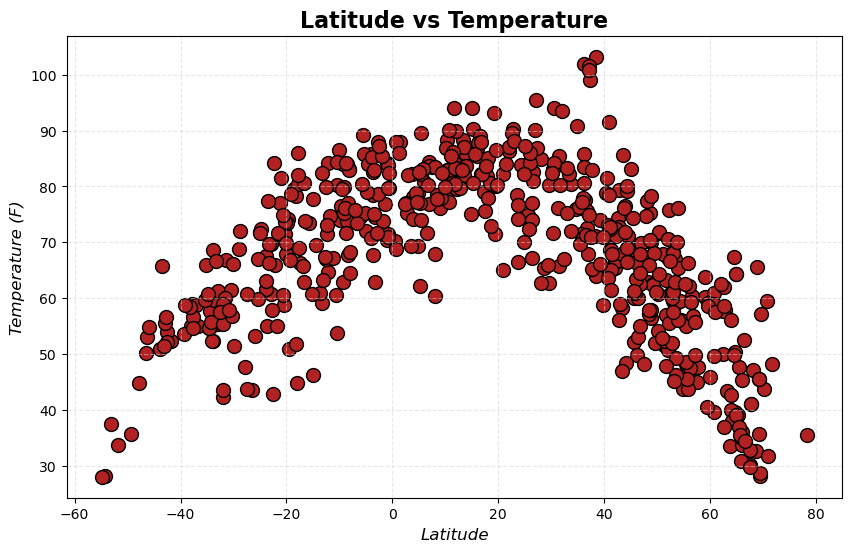

In [13]:
# Build scatter plot for latitude vs. temperature
x = city_data_df.Lat
y = city_data_df["Max Temp"]

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

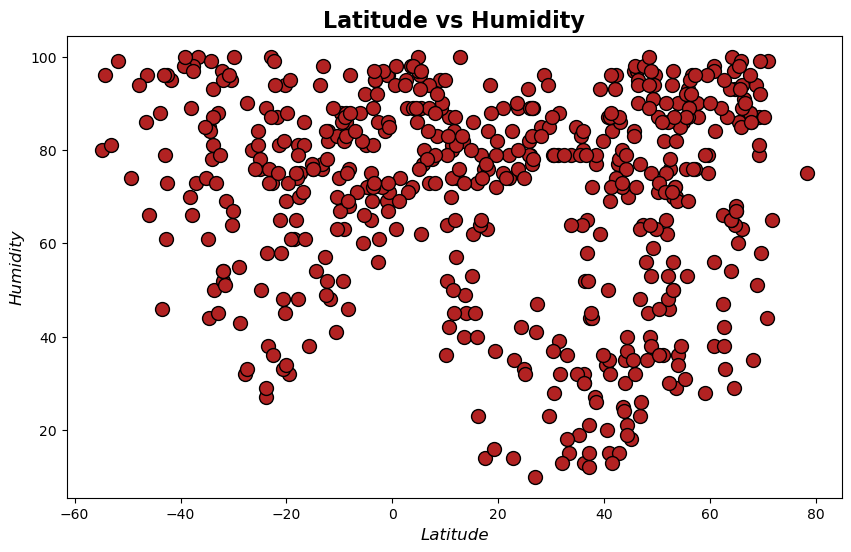

In [14]:
# Build the scatter plots for latitude vs. humidity
# Step 1: Get the Data
x = city_data_df.Lat
y = city_data_df.Humidity

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

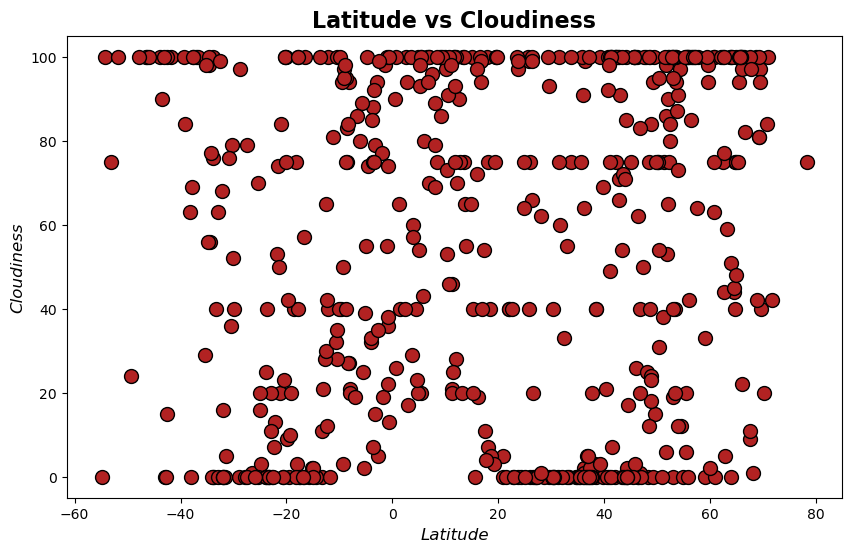

In [15]:
# Build the scatter plots for latitude vs. humidity
# Step 1: Get the Data
x = city_data_df.Lat
y = city_data_df.Cloudiness

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

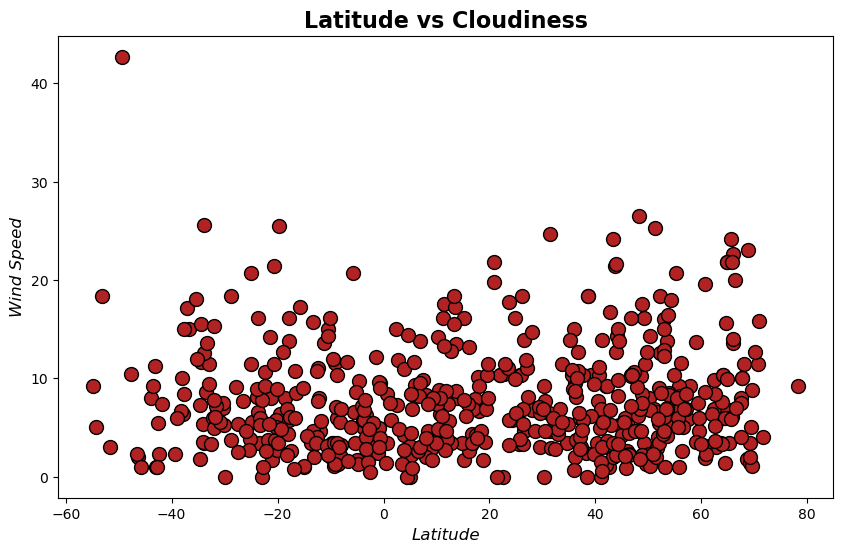

In [16]:
# Build the scatter plots for latitude vs. humidity
# Step 1: Get the Data
x = city_data_df.Lat
y = city_data_df["Wind Speed"]	

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def doRegression(x_value, y_values, x_title, y_title, annotation_pos):
    # USING LINREGRESS
    
    # makes the line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculate the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # make the plot
    # Step 2: Make the canvas
    plt.figure(figsize=(10, 6))
    
    # Step 3: Make the basic plot
    plt.scatter(x_values, y_values, facecolor="firebrick", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") # plot the line of best fit
    
    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,86.43,79,40,10.36,US,1717641007
4,lompoc,34.6391,-120.4579,76.01,85,0,3.44,US,1717641010
6,yorkton,51.2167,-102.4677,51.64,82,75,25.32,CA,1717641012
10,bilibino,68.0546,166.4372,47.08,35,1,11.50,RU,1717641014
11,tiksi,71.6872,128.8694,48.27,65,42,4.00,RU,1717641015


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alice springs,-23.7000,133.8833,54.95,58,40,16.11,AU,1717640999
2,grytviken,-54.2811,-36.5092,28.15,96,100,5.03,GS,1717641008
3,puerto ayora,-0.7393,-90.3518,71.55,96,36,9.48,EC,1717641009
5,margaret river,-33.9500,115.0667,68.58,81,76,25.64,AU,1717641010
7,port-aux-francais,-49.3500,70.2167,35.69,74,24,42.70,TF,1717641012


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5804861735998457


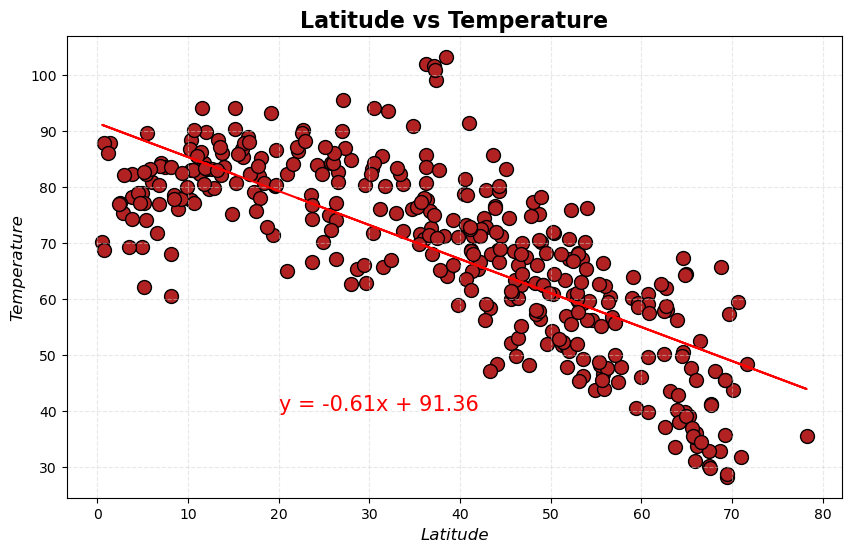

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (20,40))

The r-squared is: 0.5753027866873256


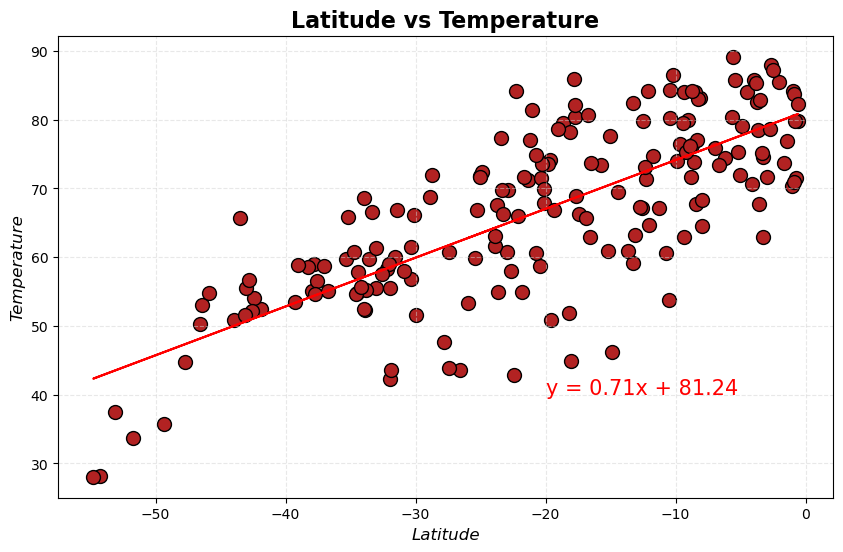

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (-20,40))

**Discussion about the linear relationship:** You can see that the closer you get to the equator, the higher the max temperature gets.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0007186827382480207


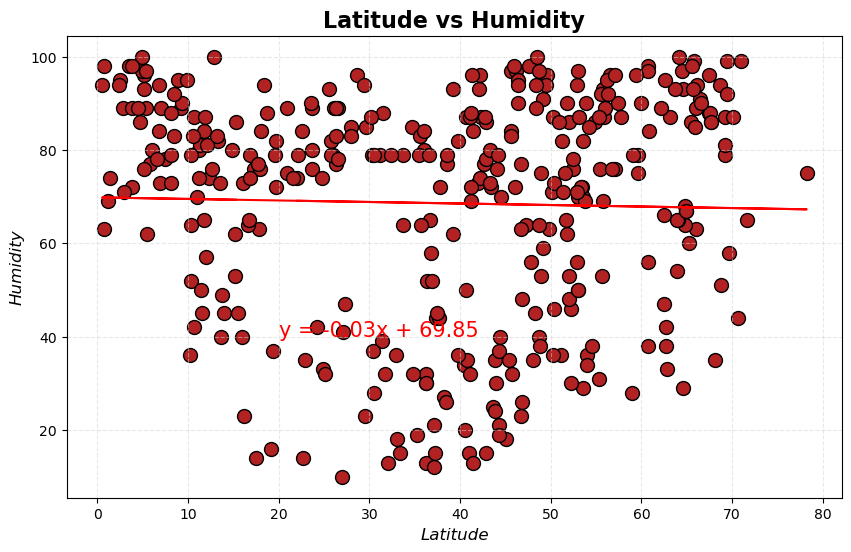

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Humidity
doRegression(x_values, y_values, "Latitude", "Humidity", (20,40))

The r-squared is: 0.0035447306302588736


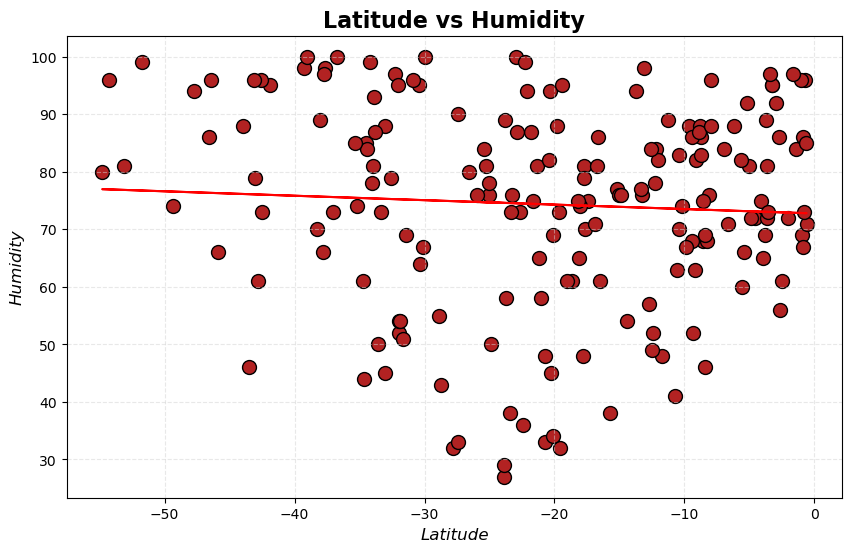

In [23]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Humidity
doRegression(x_values, y_values, "Latitude", "Humidity", (20,40))

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0017644069104232043


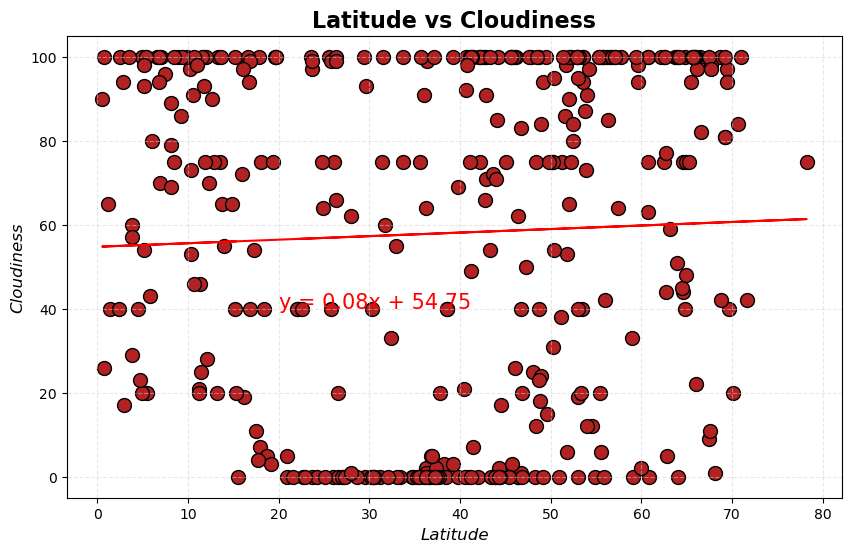

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Cloudiness
doRegression(x_values, y_values, "Latitude", "Cloudiness", (20,40))

The r-squared is: 0.0023178717608903793


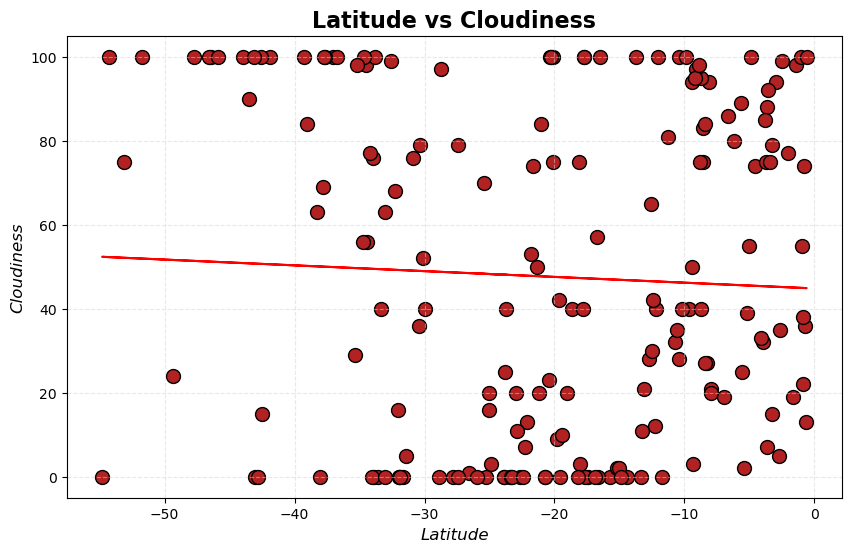

In [25]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Cloudiness
doRegression(x_values, y_values, "Latitude", "Cloudiness", (20,40))

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00829952789983048


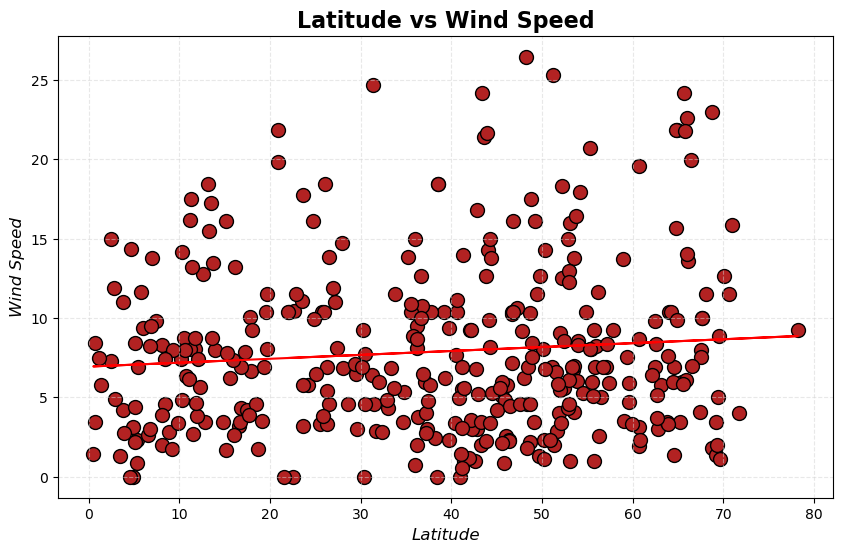

In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed", (20,40))

The r-squared is: 0.041486367000028085


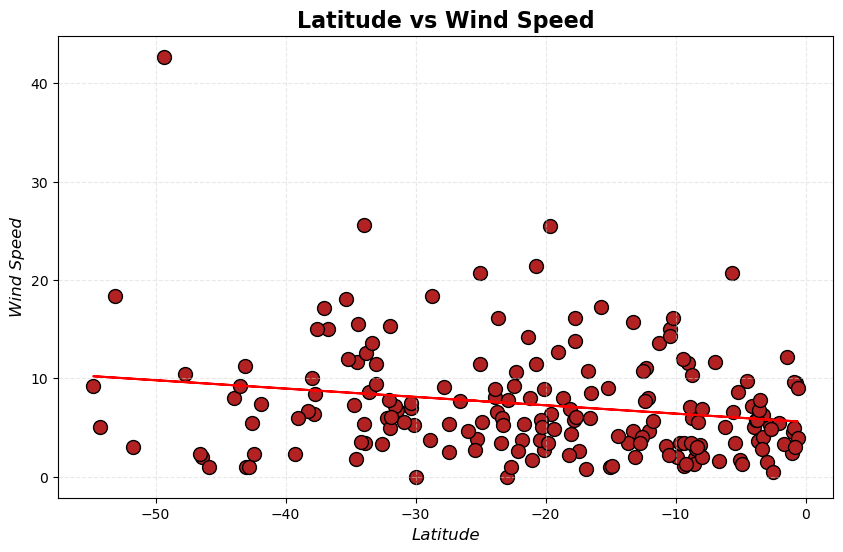

In [27]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed", (20,40))